In [1]:
from gg1 import GG1Queue, PDF
import matplotlib.pyplot as plt
import seaborn as sns

# Define the constants for service and arrival time distributions
SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.2}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.5}

SERVICE_NORMAL_KWARGS = {'loc': 0, 'scale': 1.0}
ARRIVAL_NORMAL_KWARGS = {'loc': 0.5, 'scale': 1.5}

SERVICE_HAWKES_KWARGS = {'mu': 1.2, 'alpha': 1.1, 'beta': 1.5}
ARRIVAL_HAWKES_KWARGS = {'mu': 1.5, 'alpha': 1.0, 'beta': 1.1}

SERVICE_UNIFORM_KWARGS = {'low': 0.5, 'high': 1.5}
ARRIVAL_UNIFORM_KWARGS = {'low': 0, 'high': 0.5}


# Looking at different combinations of Service and Arrival probability distributions 

* Queue length with time plot, and
* (max queue length, average wait time)

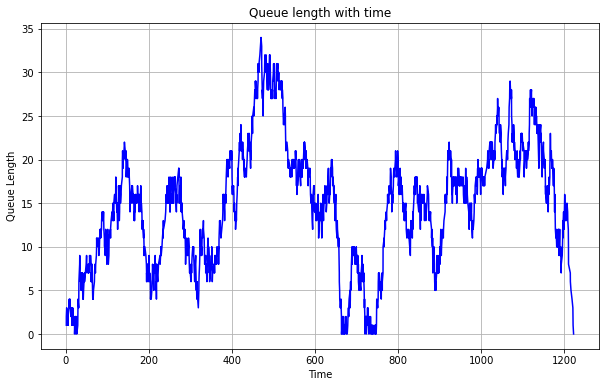

(34, 17.90218121868056)


In [2]:
queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


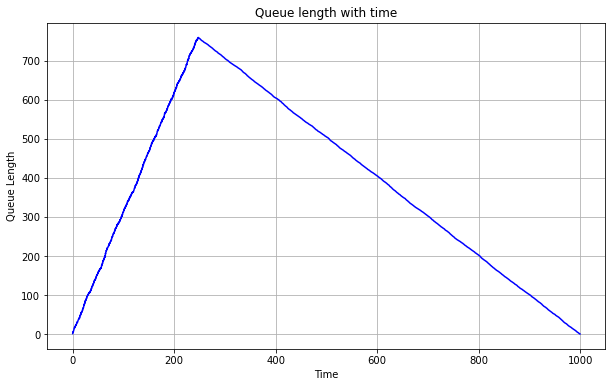

(760, 380.46998192902646)


In [3]:
queue = GG1Queue(1000, PDF.UNIFORM, PDF.UNIFORM, SERVICE_UNIFORM_KWARGS, ARRIVAL_UNIFORM_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


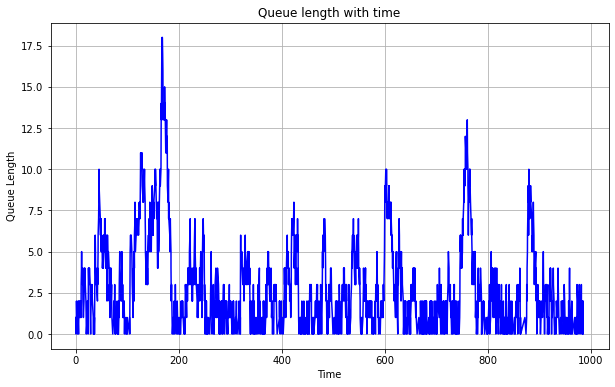

(18, 2.6049792736030297)


In [4]:
SERVICE_NORMAL_KWARGS = {'loc': 0, 'scale': 1.0}
ARRIVAL_HAWKES_KWARGS = {'mu': 1, 'alpha': 0.0, 'beta': 1.1}


queue = GG1Queue(1000, PDF.NORMAL, PDF.HAWKES, SERVICE_NORMAL_KWARGS, ARRIVAL_HAWKES_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


## Event Intervals generated by Hawkes process

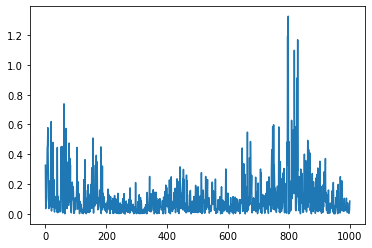

In [5]:
queue = GG1Queue(1000, PDF.NORMAL, PDF.HAWKES, SERVICE_NORMAL_KWARGS, ARRIVAL_HAWKES_KWARGS)
intervals = queue._simulate_hawkes_process(mu=1, alpha=1, beta=1.1, num_events=1000)
plt.plot(intervals)

## Seevice and Arrival as Hawkes

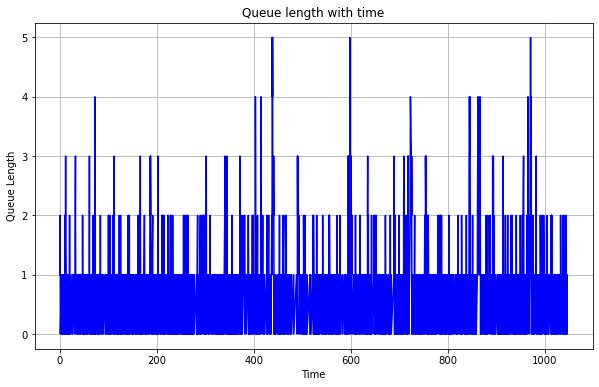

(5, 0.38239100186585917)


In [6]:
queue = GG1Queue(1000, PDF.HAWKES, PDF.HAWKES, SERVICE_HAWKES_KWARGS, ARRIVAL_HAWKES_KWARGS)
queue.run_simulation()
queue.plot_queue_length()
print(queue.get_queue_stats())


## Distribution of 'average wait time' taking a sample=1000 of queues

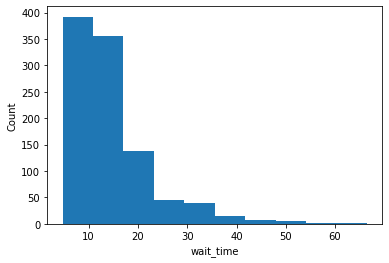

In [7]:
wait_time = []
for _ in range(1000):
    queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
    queue.run_simulation()
    _ , wt = queue.get_queue_stats()
    wait_time.append(wt)

plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

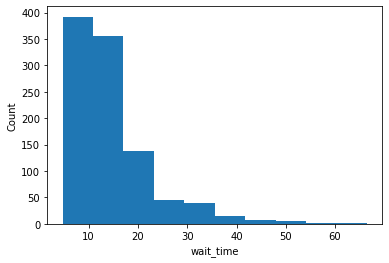

In [8]:
plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


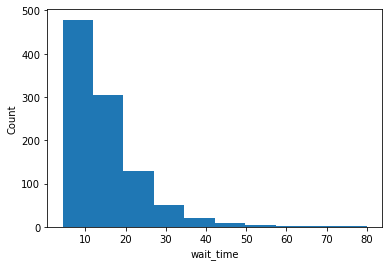

In [9]:
import time
from contextlib import contextmanager
import numpy as np

@contextmanager
def timer():
    start = time.perf_counter()
    yield
    end = time.perf_counter()
    

wait_time = []
run_time = []

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(1000, PDF.EXPONENTIAL, PDF.NORMAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_NORMAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")

plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

In [9]:
import time
from contextlib import contextmanager

@contextmanager
def timer():
    start = time.perf_counter()
    yield
    end = time.perf_counter()
    print(f"Elapsed time: {end - start} seconds")

wait_time = []
run_time = []

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(1000, PDF.HAWKES, PDF.NORMAL, SERVICE_HAWKES_KWARGS, ARRIVAL_NORMAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


Elapsed time: 0.9460551000001942 seconds
Run #1 took None seconds.
Elapsed time: 0.9978644000002532 seconds
Elapsed time: 1.000946500000282 seconds
Elapsed time: 1.001433299999917 seconds
Elapsed time: 0.8578717999998844 seconds
Elapsed time: 0.8984160999998494 seconds
Elapsed time: 1.1176470000000336 seconds
Elapsed time: 1.0517546000000948 seconds
Elapsed time: 1.2257570000001579 seconds
Elapsed time: 1.2834243999996033 seconds
Elapsed time: 1.0538603999993938 seconds
Elapsed time: 1.3362762999995539 seconds
Elapsed time: 1.1314903000002232 seconds
Elapsed time: 1.3269378000004508 seconds
Elapsed time: 1.1967290000002322 seconds
Elapsed time: 1.5177755000004254 seconds
Elapsed time: 1.4741727999999057 seconds
Elapsed time: 1.193952000000536 seconds
Elapsed time: 1.231155100000251 seconds
Elapsed time: 1.0667165999993813 seconds
Elapsed time: 1.2407616999998936 seconds
Elapsed time: 1.0531182000004264 seconds
Elapsed time: 0.8914735999996992 seconds
Elapsed time: 0.9786039999999048 se

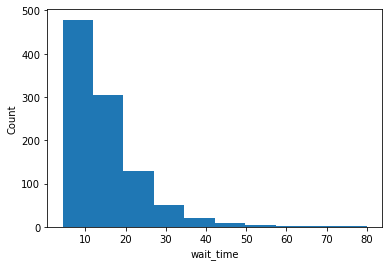

In [10]:
plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

In [11]:
import time
from contextlib import contextmanager

@contextmanager
def timer():
    start = time.perf_counter()
    yield
    end = time.perf_counter()
    #print(f"Elapsed time: {end - start} seconds")

wait_time = []
run_time = []

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(1000, PDF.HAWKES, PDF.HAWKES, SERVICE_HAWKES_KWARGS, ARRIVAL_HAWKES_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


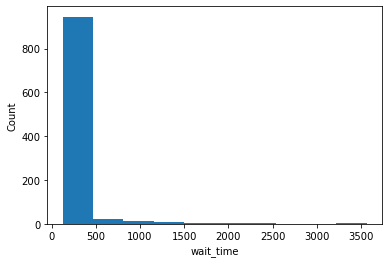

In [12]:
plt.hist(wait_time)
plt.xlabel('wait_time')
plt.ylabel('Count')
plt.show()

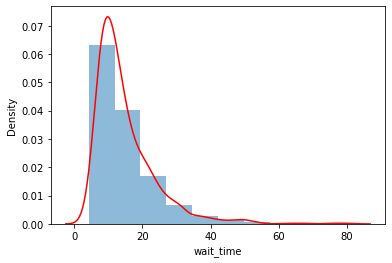

In [11]:
plt.hist(wait_time, density=True, alpha=0.5)  # Set density=True for normalized histogram
sns.kdeplot(wait_time, color='r')

plt.xlabel('wait_time')
plt.ylabel('Density')
plt.show()

# Comparing to MM1 theoretical values

The average wait time ($W$) in an M/M/1 queue can be expressed in terms of the arrival rate ($\lambda$) and the service rate ($\mu$) using the following formula: $$W=\frac{1}{\mu- \lambda}$$



Below we see that when $\lambda$ is less than $\mu$ then:
1. average wait time is close to theoretical value
2. Does not change when 'total number of arrivals' is increased


When $\lambda$ is more than $\mu$ then:
1. average wait time increases by increasing the 'total number of arrivals', hence diverges.



Note: The parameter 'scale' is 1/rate.





In [12]:
wait_time = []
run_time = []

SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.2}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.5}

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(10000, PDF.EXPONENTIAL, PDF.EXPONENTIAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_EXPONENTIAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


np.mean(wait_time)


Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


6.0000101009296225

#### Theoretical value

$\mu = 1/1.2 =  $ and $\lambda = 1/1.5$

Putting this in expression for $W$ we get 6.

In [16]:
# increasing the total number of arrivals
wait_time = []
run_time = []

SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.2}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.5}

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(100000, PDF.EXPONENTIAL, PDF.EXPONENTIAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_EXPONENTIAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


np.mean(wait_time)


Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


6.005895730539558

In [13]:
wait_time = []
run_time = []

SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.5}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.2}

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(10000, PDF.EXPONENTIAL, PDF.EXPONENTIAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_EXPONENTIAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


np.mean(wait_time)


Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


1508.074119316557

In [15]:
wait_time = []
run_time = []

SERVICE_EXPONENTIAL_KWARGS = {'scale': 1.2}
ARRIVAL_EXPONENTIAL_KWARGS = {'scale': 1.2}

for i in range(1000):
    with timer() as t:
        queue = GG1Queue(100000, PDF.EXPONENTIAL, PDF.EXPONENTIAL, SERVICE_EXPONENTIAL_KWARGS, ARRIVAL_EXPONENTIAL_KWARGS)
        queue.run_simulation()
        _ , wt = queue.get_queue_stats()
        wait_time.append(wt)
    run_time.append(t)
    if i == 0 or (i+1) % 100 == 0:
        print(f"Run #{i+1} took {t} seconds.")


np.mean(wait_time)


Run #1 took None seconds.
Run #100 took None seconds.
Run #200 took None seconds.
Run #300 took None seconds.
Run #400 took None seconds.
Run #500 took None seconds.
Run #600 took None seconds.
Run #700 took None seconds.
Run #800 took None seconds.
Run #900 took None seconds.
Run #1000 took None seconds.


292.8628011424167